# Goal
* Show how to use torch to make an MLP
* Use the MLP to approximate a simple function
* not using an optimizer, so we can see the bare bones

# setup
* Assume anacaonda is installed and on the path. 

conda config --add channels pytorch
conda config --add channels anaconda
conda config --show channels

```
conda create --name tutorial3 python=3.7 
conda activate tutorial3
conda install pytorch torchvision torchaudio cpuonly jupyter ffmpeg-python matplotlib ipython  ipykernel
python -m ipykernel install --user --name=tutorial3





conda env export --no-builds > my_env.yml
pip list --format=freeze > requirements.txt

```

In [ ]:
# zeromq

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
%matplotlib inline

In [3]:
x = torch.linspace(-1,1,20)
ep = torch.rand(x.shape)*0.1
y = x**2 +ep*2

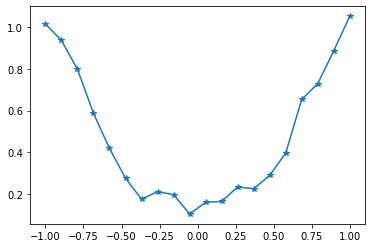

In [4]:
plt.plot(x,y, "*-")

In [5]:
def make_mlp(n = 20, layer_count = 3):
    layers = []
    layers.append(nn.Linear(1,n))
    layers.append(nn.ReLU())
    for i in range(layer_count-1):      
        layers.append(nn.Linear(n,n))
        layers.append(nn.ReLU())
    layers.append(nn.Linear(n,1))
    mymlp = nn.Sequential(*layers)
    return mymlp

In [6]:
mymlp = make_mlp()
mymlp

Sequential(
  (0): Linear(in_features=1, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=20, bias=True)
  (5): ReLU()
  (6): Linear(in_features=20, out_features=1, bias=True)
)

In [7]:
xb = x[:,None]
yb = y[:,None]
print(xb.shape, x.shape)

torch.Size([20, 1]) torch.Size([20])


In [8]:
yprime = mymlp(xb)

In [9]:
yprime2 = yprime.squeeze().detach()

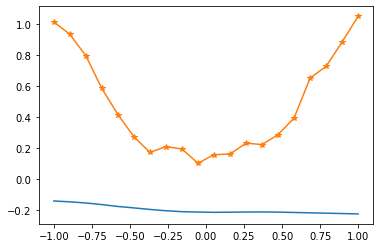

In [10]:
plt.plot(x,yprime2, label = 'predicted')
plt.plot(x,y, "*-", label = 'true')

In [11]:
yprime.shape

torch.Size([20, 1])

In [12]:
myloss_value = F.mse_loss(yprime, yb)


In [13]:
myloss_value.backward()

In [14]:
lr = 1e-3
with torch.no_grad():
    for name, param in mymlp.named_parameters():
        param.data = param.data - param.grad*lr 
        param.grad = None    

In [15]:
def do_step(lr, model):
    with torch.no_grad():
        for name, param in model.named_parameters():
            param.data = param.data - param.grad*lr 
            param.grad = None   
#     model.zero_grad()

# put it together in loop

In [16]:

epochs = 200
lr = 1e-1
for i in range(epochs):
    yprime = mymlp(xb)
    myloss_value = F.mse_loss(yprime, yb)
    myloss_value.backward()
    do_step(lr, mymlp)
    if i % 50 ==0:
        print(i,myloss_value)

0 tensor(0.5426, grad_fn=<MseLossBackward0>)
50 tensor(0.0640, grad_fn=<MseLossBackward0>)
100 tensor(0.0282, grad_fn=<MseLossBackward0>)
150 tensor(0.0109, grad_fn=<MseLossBackward0>)


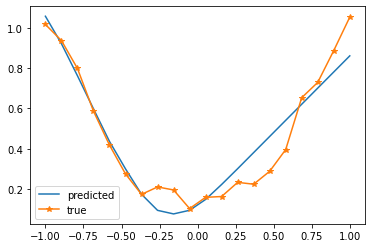

In [17]:
yprime2 = yprime.squeeze().detach()
plt.plot(x,yprime2, label = 'predicted')
plt.plot(x,y, "*-", label = 'true')
plt.legend()

# make an animation 

In [18]:
from matplotlib.animation import FuncAnimation
from IPython import display

In [19]:
def my_hidden_function(_input):
    ep = torch.rand(_input.shape)*0.1
    y = _input**2 +ep*2
    return y

In [20]:
# mymplp2 =make_mlp()/

In [38]:
class my_NN_optimier:
    def __init__(self, func):
        self.mymlp = make_mlp()
        self.epoch = 0
        self.x = x = torch.linspace(-1,1,20)
        self.xb = xb = self.x[:,None]
        self.func = func
        self.yb = func(xb)
    
    def reset_mlp(self):
        self.mlp = make_mlp()
        
    def step(self):
        lr = 1e-1
#         for i in range(epochs):
        self.yprime = self.mymlp(self.xb)
        myloss_value = F.mse_loss(self.yprime, self. yb)
        myloss_value.backward()
        do_step(lr, self.mymlp)
        if self.epoch % 50 ==0:
            print(self.epoch,myloss_value)
        self.epoch +=1

In [39]:
nn_opt = my_NN_optimier(my_hidden_function)

In [40]:
# nn_opt.step()

In [41]:
# %matplotlib widget
# %matplotlib notebook

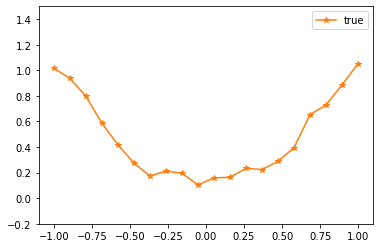

In [42]:
fig = plt.figure()
ax = plt.axes(xlim=(-1.1, 1.1), ylim=(-0.2, 1.5))
line, = ax.plot([], [],'d-', lw=3)

ax.plot(x,y, "*-", label = 'true')
ax.legend()

def init():
    nn_opt.reset_mlp()
    line.set_data([], [])
    return line,

def animate(i):
#     x = np.linspace(0, 4, 1000)
#     y = np.sin(2 * np.pi * (x - 0.01 * i))
    nn_opt.step()
    yprime2 = nn_opt.yprime.squeeze().detach()
    line.set_data(x, yprime2)
    return line,

In [43]:
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# plt.show()

In [44]:
# anim.save('myanim.gif')

In [45]:
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

0 tensor(0.3839, grad_fn=<MseLossBackward0>)
50 tensor(0.0958, grad_fn=<MseLossBackward0>)
100 tensor(0.0622, grad_fn=<MseLossBackward0>)
150 tensor(0.0155, grad_fn=<MseLossBackward0>)
